In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from collections import namedtuple
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontManager, FontProperties

# 设置全局字体为中文字体
font_path = '/System/Library/Fonts/PingFang.ttc'
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

In [2]:
df = pd.read_excel('data/mpd2020.xlsx', sheet_name='Full data')
df

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.00000
1,AFG,Afghanistan,1870,NaN,4207.00000
2,AFG,Afghanistan,1913,NaN,5730.00000
3,AFG,Afghanistan,1950,1156.0000,8150.00000
4,AFG,Afghanistan,1951,1170.0000,8284.00000
...,...,...,...,...,...
21677,ZWE,Zimbabwe,2014,1594.0000,13313.99205
21678,ZWE,Zimbabwe,2015,1560.0000,13479.13812
21679,ZWE,Zimbabwe,2016,1534.0000,13664.79457
21680,ZWE,Zimbabwe,2017,1582.3662,13870.26413


In [3]:
# 数据集中有多少个国家和哪些国家可用
len(df.country.unique())

169

In [4]:
# 统计数据中每个国家有数据的年份
country_years = []
for country in df.country.unique():
    country_data = df[df.country == country]['year']
    country_years.append((country, country_data.min(), country_data.max()))

country_df = pd.DataFrame(country_years, columns=['country', 'Min Year', 'Max Year'])
country_df

,country,Min Year,Max Year
0,Afghanistan,1820,2018
1,Angola,1950,2018
2,Albania,1,2018
3,United Arab Emirates,1950,2018
4,Argentina,1800,2018
...,...,...,...
164,Yemen,1820,2018
165,Former Yugoslavia,1,2018
166,South Africa,1,2018
167,Zambia,1950,2018


In [34]:
# 建立国家代码和国家名称的映射
country_code_name_map = df[['countrycode', 'country']].drop_duplicates().reset_index(drop=True).set_index(['countrycode'])
country_code_name_map
# country_code_name_map.loc['CHN']['country']

'China'

In [8]:
# 国家每年gdp图表
gdppc = df.set_index(['countrycode', 'year'])['gdppc']
gdppc = gdppc.unstack('countrycode')
gdppc

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000


In [9]:
# 给国家设置对应的颜色，进行区分
country_names = df['countrycode']
colors = cm.tab20(np.linspace(0, 0.95, len(country_names)))
color_map = {country: color for country, color in zip(country_names, colors)}
color_map

{'AFG': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'AGO': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'ALB': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'ARE': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'ARG': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'ARM': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'AUS': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'AUT': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'AZE': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'BDI': array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'BEL': array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 'BEN': array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 'BFA': array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 'BGD': array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 'BGR': array([0.68235294, 0.78039216, 0.90980392, 1.        ]),
 'BHR': array([0.68235294

<Axes: xlabel='Year', ylabel="International $'s">

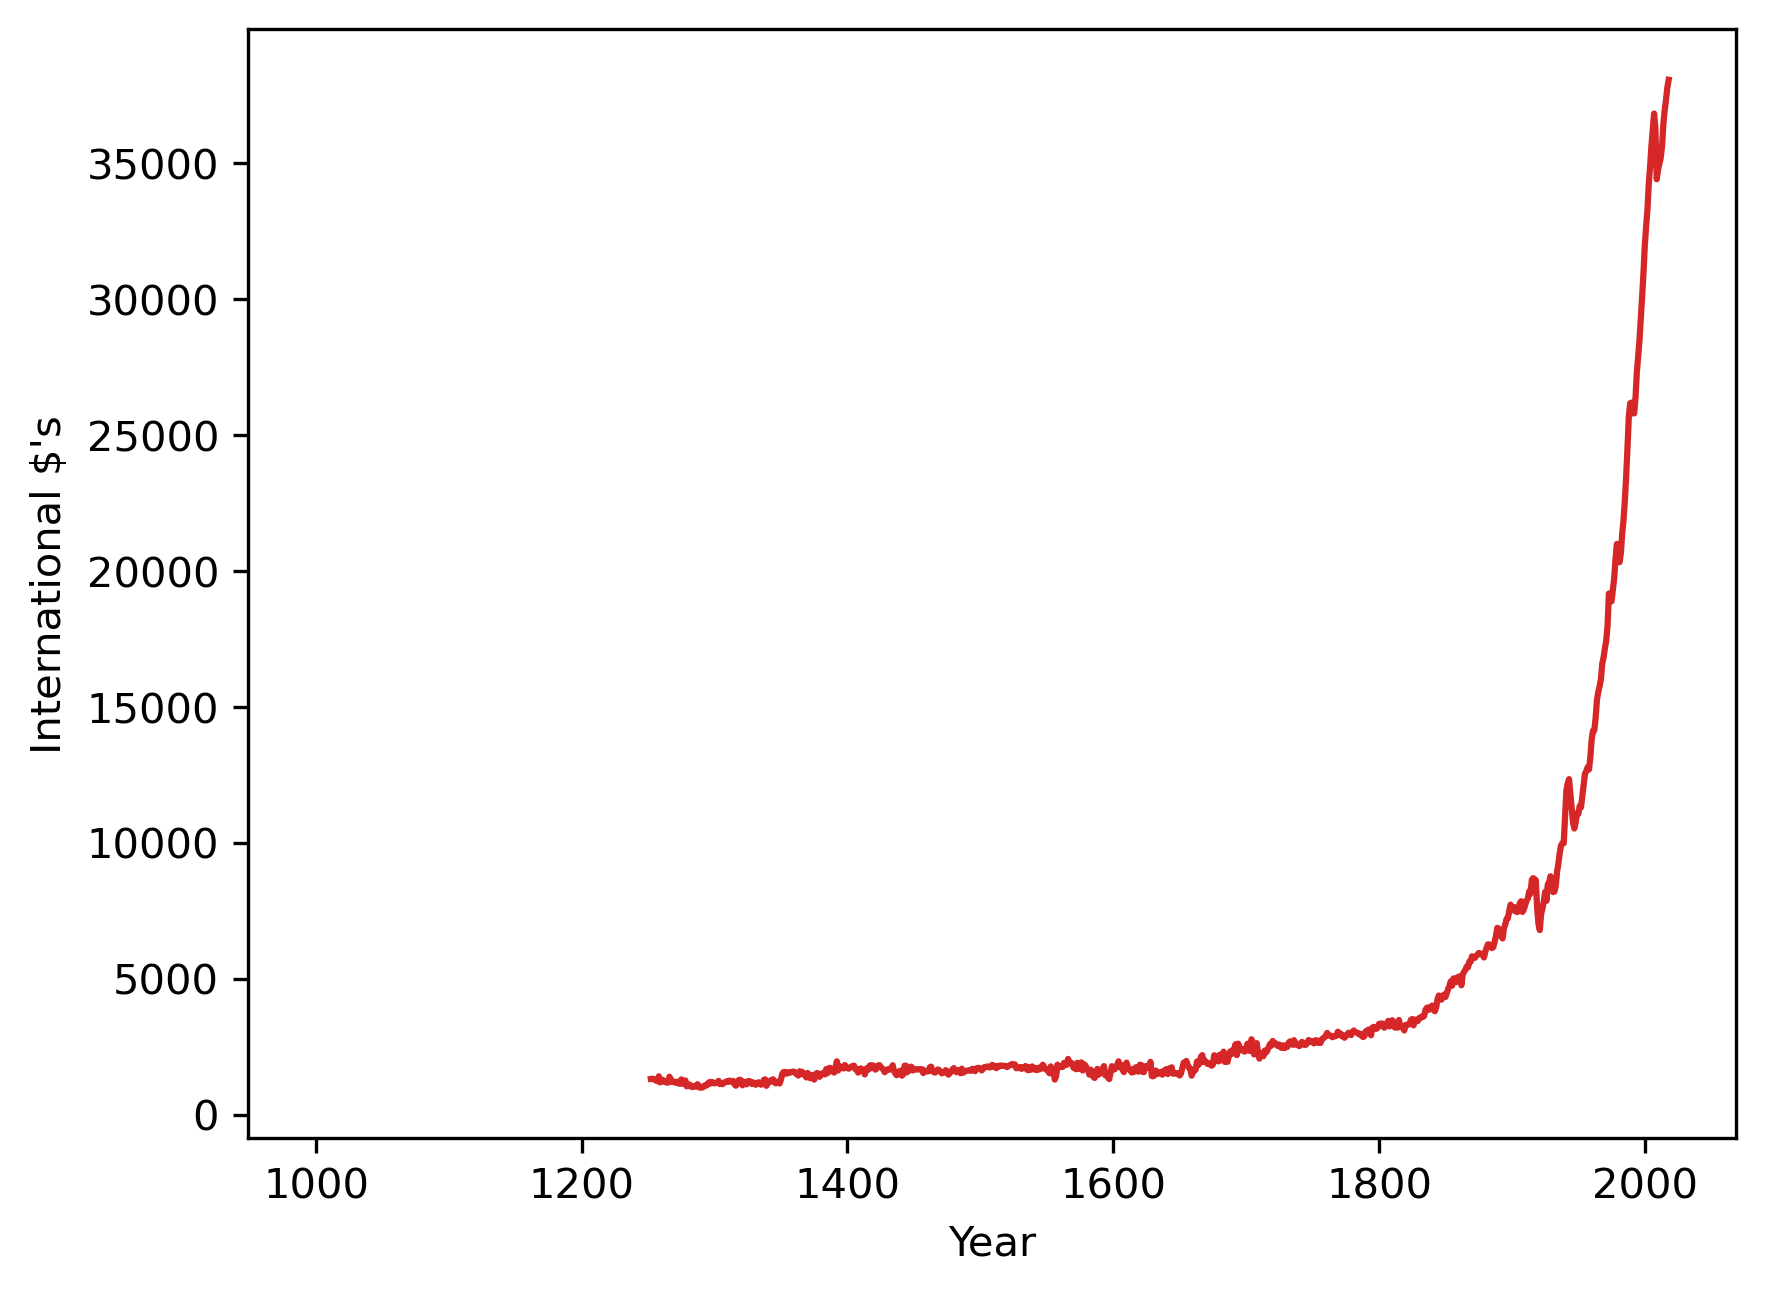

In [12]:
# 绘制英国gpd图表
fig, ax = plt.subplots(dpi=300)
countrycode = 'GBR'
gdppc[countrycode].plot(
    ax=fig.gca(), 
    ylabel='International $\'s', 
    xlabel='Year', 
    linestyle='-', 
    color=color_map[countrycode]
)

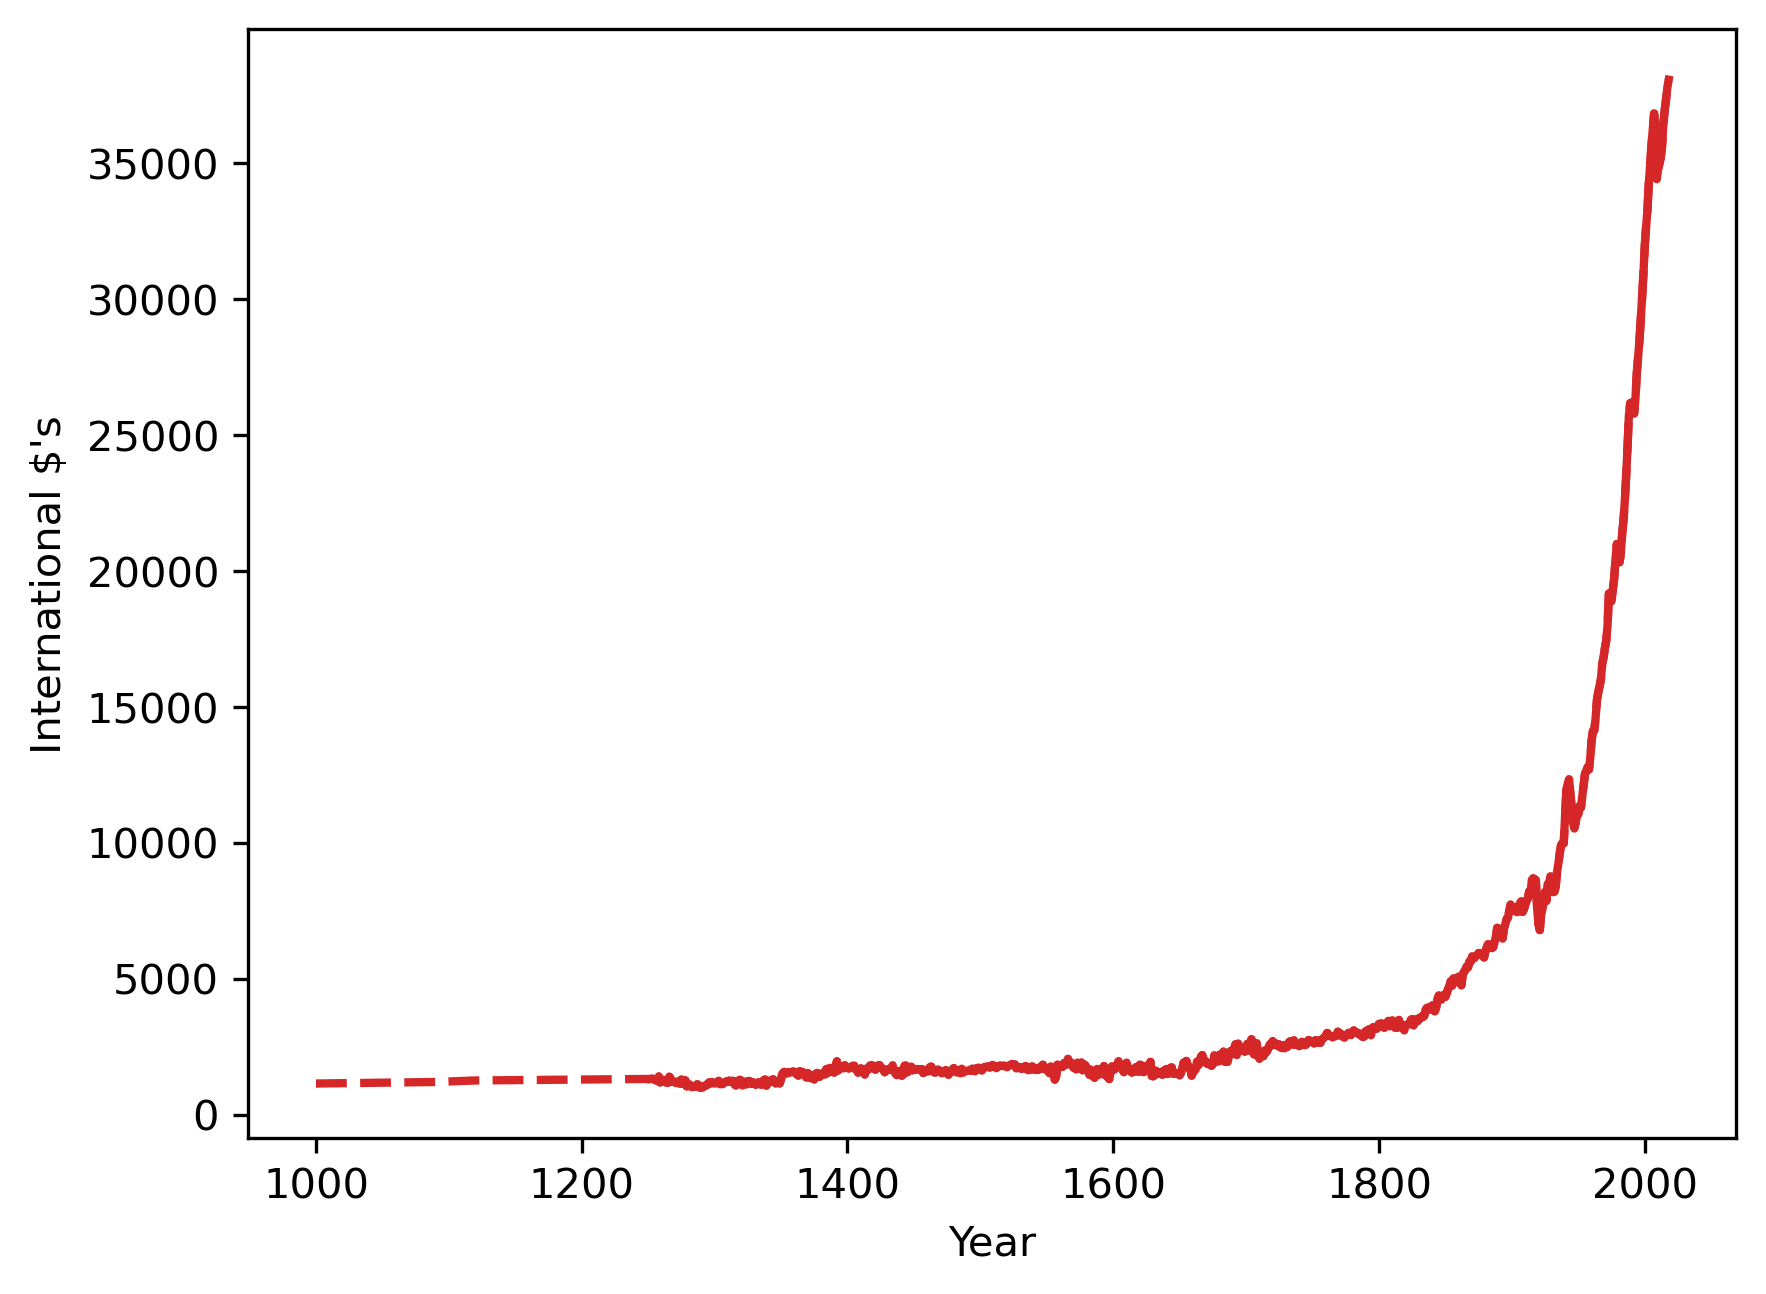

In [14]:
# 使用虚线来绘制连续数据趋势
fig, ax = plt.subplots(dpi=300)
countrycode = 'GBR'
ax.plot(
    gdppc[countrycode].interpolate(),
    linestyle='--',
    lw=2,
    color=color_map[countrycode]
)
ax.plot(
    gdppc[countrycode],
    linestyle='-',
    lw=2,
    color=color_map[countrycode]
)
ax.set_ylabel('International $\'s')
ax.set_xlabel('Year')
plt.show()

In [35]:
# 将上面绘制封装成函数
# country
def draw_interp_plots(countries, series, ylabel, xlabel, color_map, country_code_name_map, lw, logscale, ax):
    for i, c in enumerate(countries):
        df_interpolated = series[c].interpolate(limit_area='inside')
        interpolate_data = df_interpolated[series[c].isnull()]
    
        ax.plot(
            interpolate_data,
            linestyle='--',
            lw=lw,
            alpha=0.7,
            color=color_map[c]
        )
        ax.plot(
            series[c],
            linestyle='-',
            lw=lw,
            color=color_map[c],
            alpha=0.8,
            label=country_code_name_map.loc[c]['country']
        )
        
        if logscale == True:
            ax.set_yscale('log')
        
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    return ax


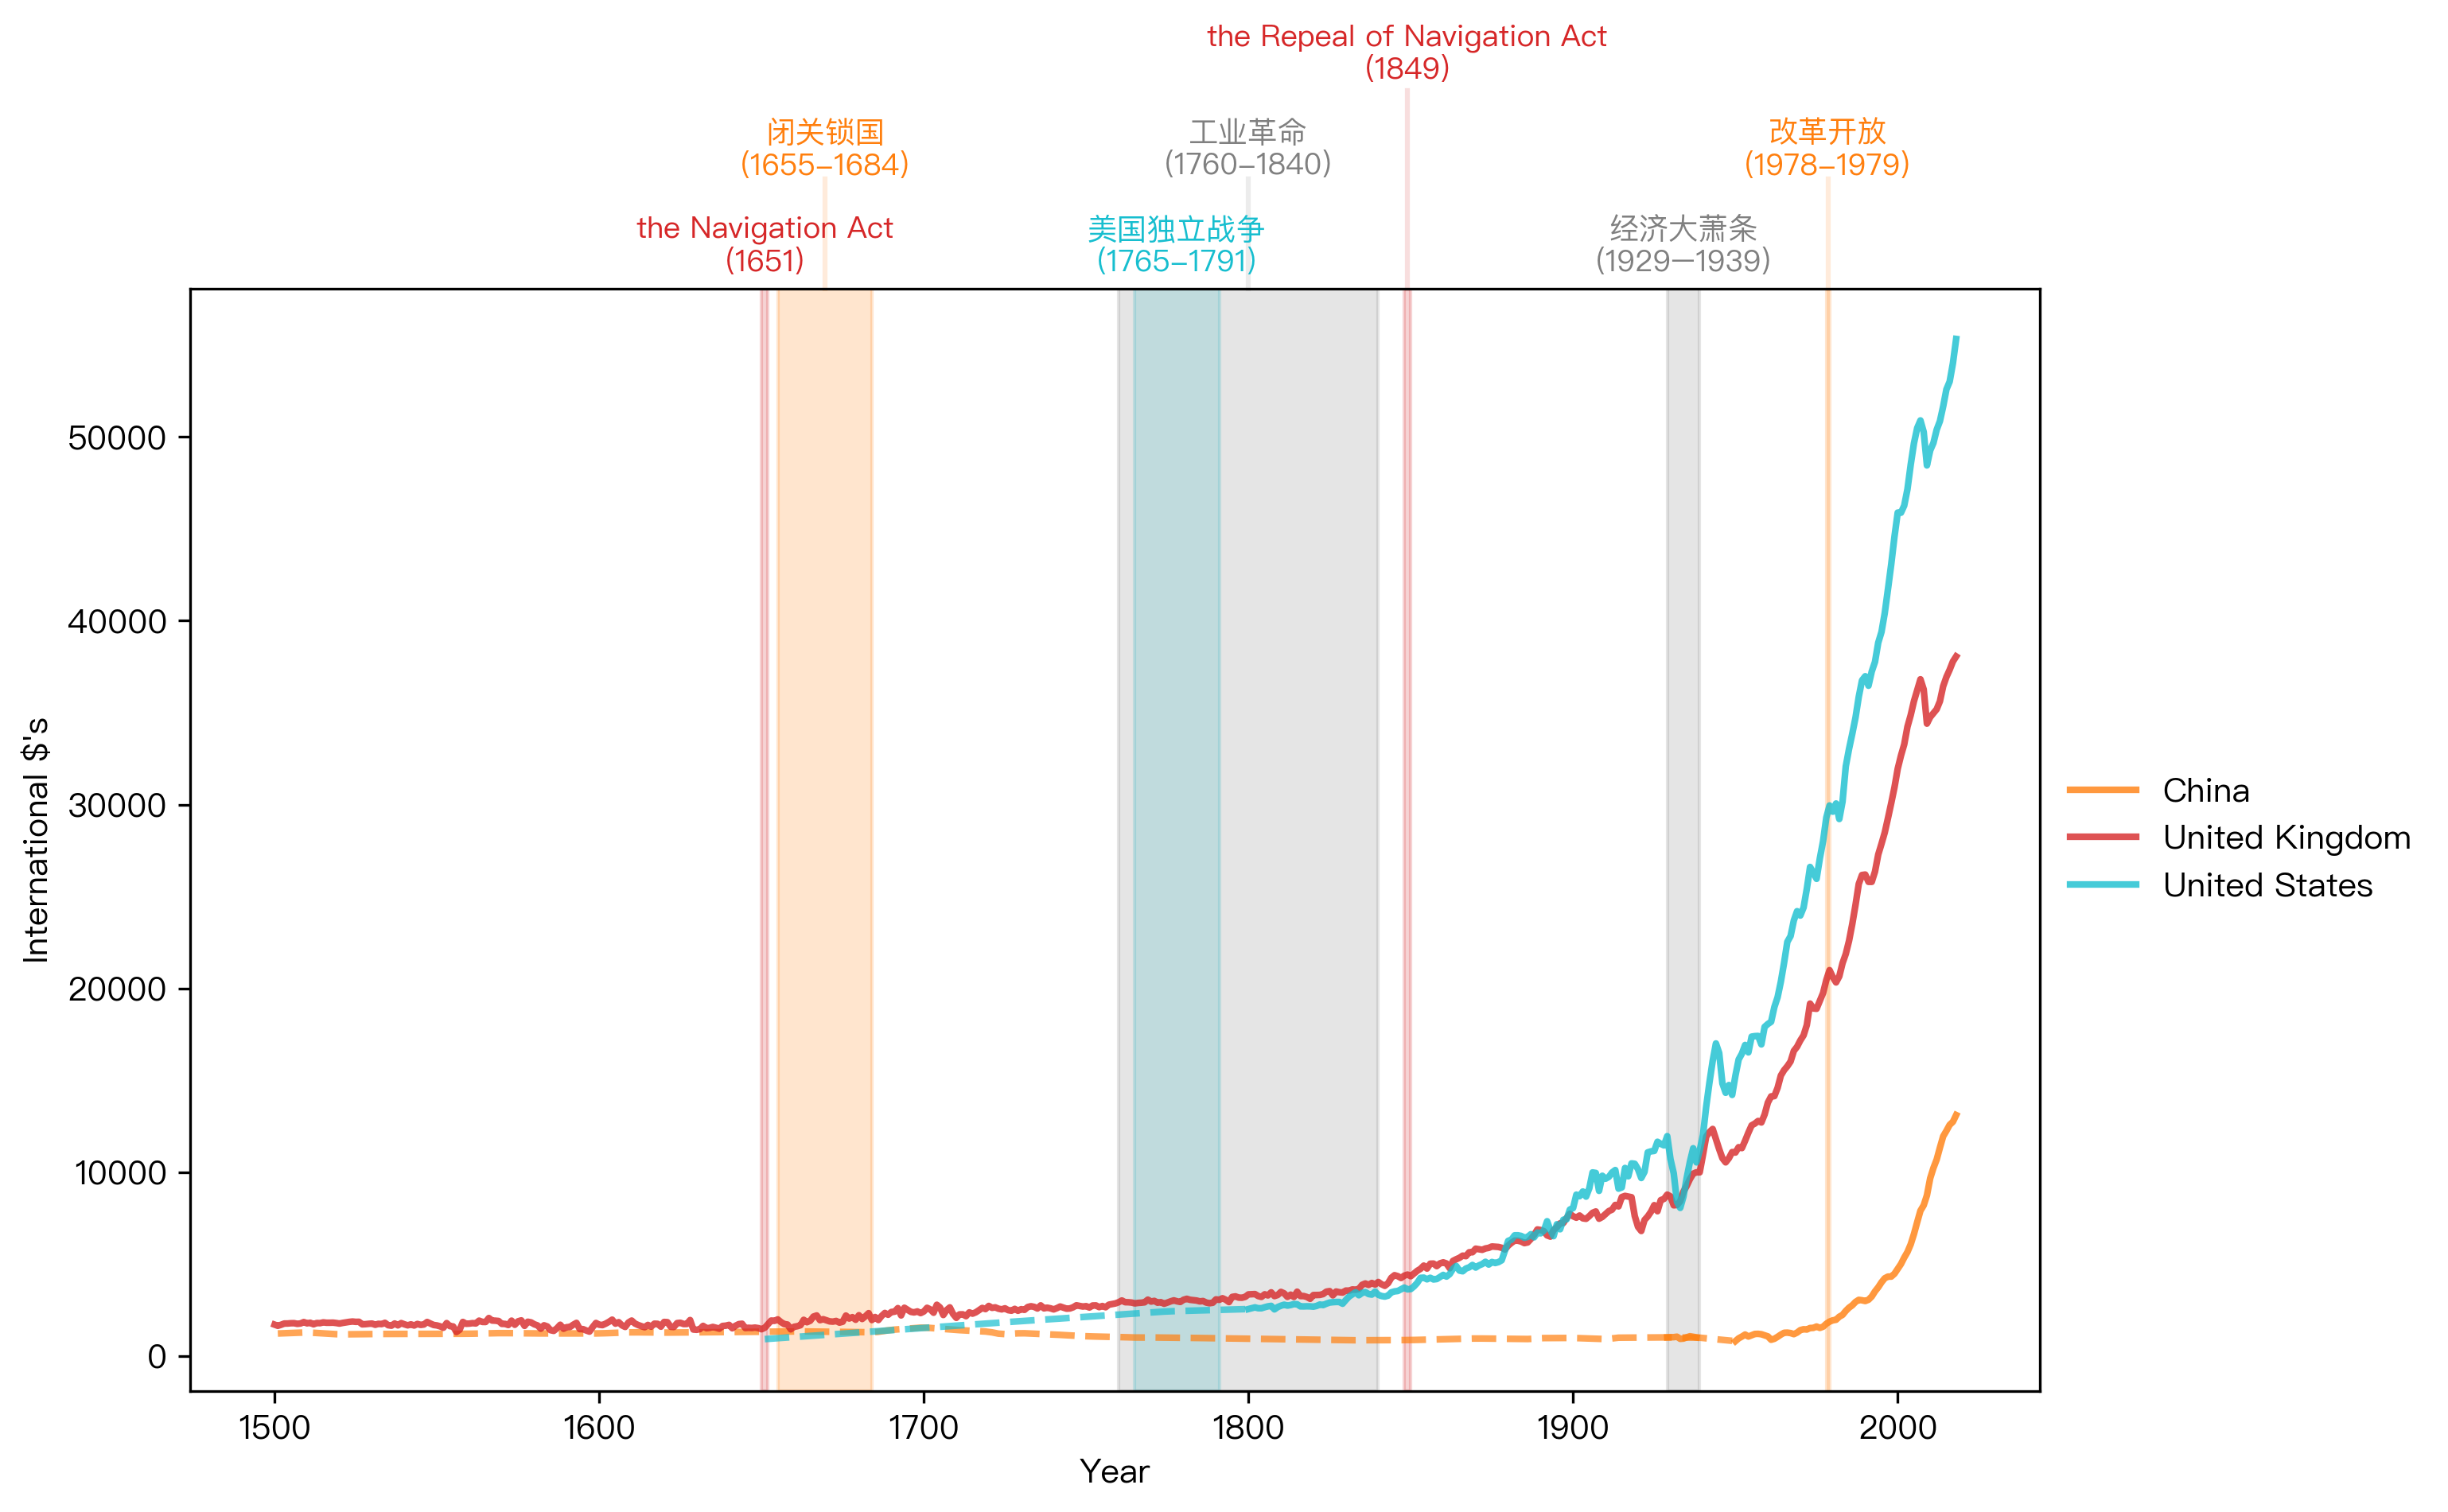

In [47]:
# 中国、美国、英国 GDP对比
# Define the namedtuple for the events
Event = namedtuple('Event', ['year_range', 'y_text', 'text', 'color', 'ymax'])

fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

countries = ['CHN', 'GBR', 'USA']
ax = draw_interp_plots(
    countries, gdppc[countries].loc[1500:],
    'International $\'s','Year',
    color_map, country_code_name_map, 2, False, ax
)

# 定义事件和文字的参数
ylim = ax.get_ylim()[1]
b_params = {'color': 'grey', 'alpha': 0.2}
t_params = {'fontsize': 9, 'va': 'center', 'ha': 'center'}

# 定义events
events = [
    Event((1650, 1652), ylim + ylim*0.04, 
          'the Navigation Act\n(1651)',
          color_map['GBR'], 1),
    Event((1655, 1684), ylim + ylim*0.13, 
          '闭关锁国\n(1655-1684)', 
          color_map['CHN'], 1.1),
    Event((1848, 1850), ylim + ylim*0.22,
          'the Repeal of Navigation Act\n(1849)', 
          color_map['GBR'], 1.18),
    Event((1765, 1791), ylim + ylim*0.04, 
          '美国独立战争\n(1765-1791)', 
          color_map['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.13, 
          '工业革命\n(1760-1840)', 
          'grey', 1.1),
    Event((1929, 1939), ylim + ylim*0.04, 
          '经济大萧条\n(1929–1939)', 
          'grey', 1),
    Event((1978, 1979), ylim + ylim*0.13, 
          '改革开放\n(1978-1979)', 
          color_map['CHN'], 1.1)
]


def draw_events(events, ax):
    # Iterate over events and add annotations and vertical lines
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid, 
                event.y_text, event.text, 
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(event_mid, ymin=1, 
        ymax=event.ymax, color=event.color, 
        linestyle='-', clip_on=False, alpha=0.15)
        
# 绘制事件
draw_events(events, ax)
plt.show()

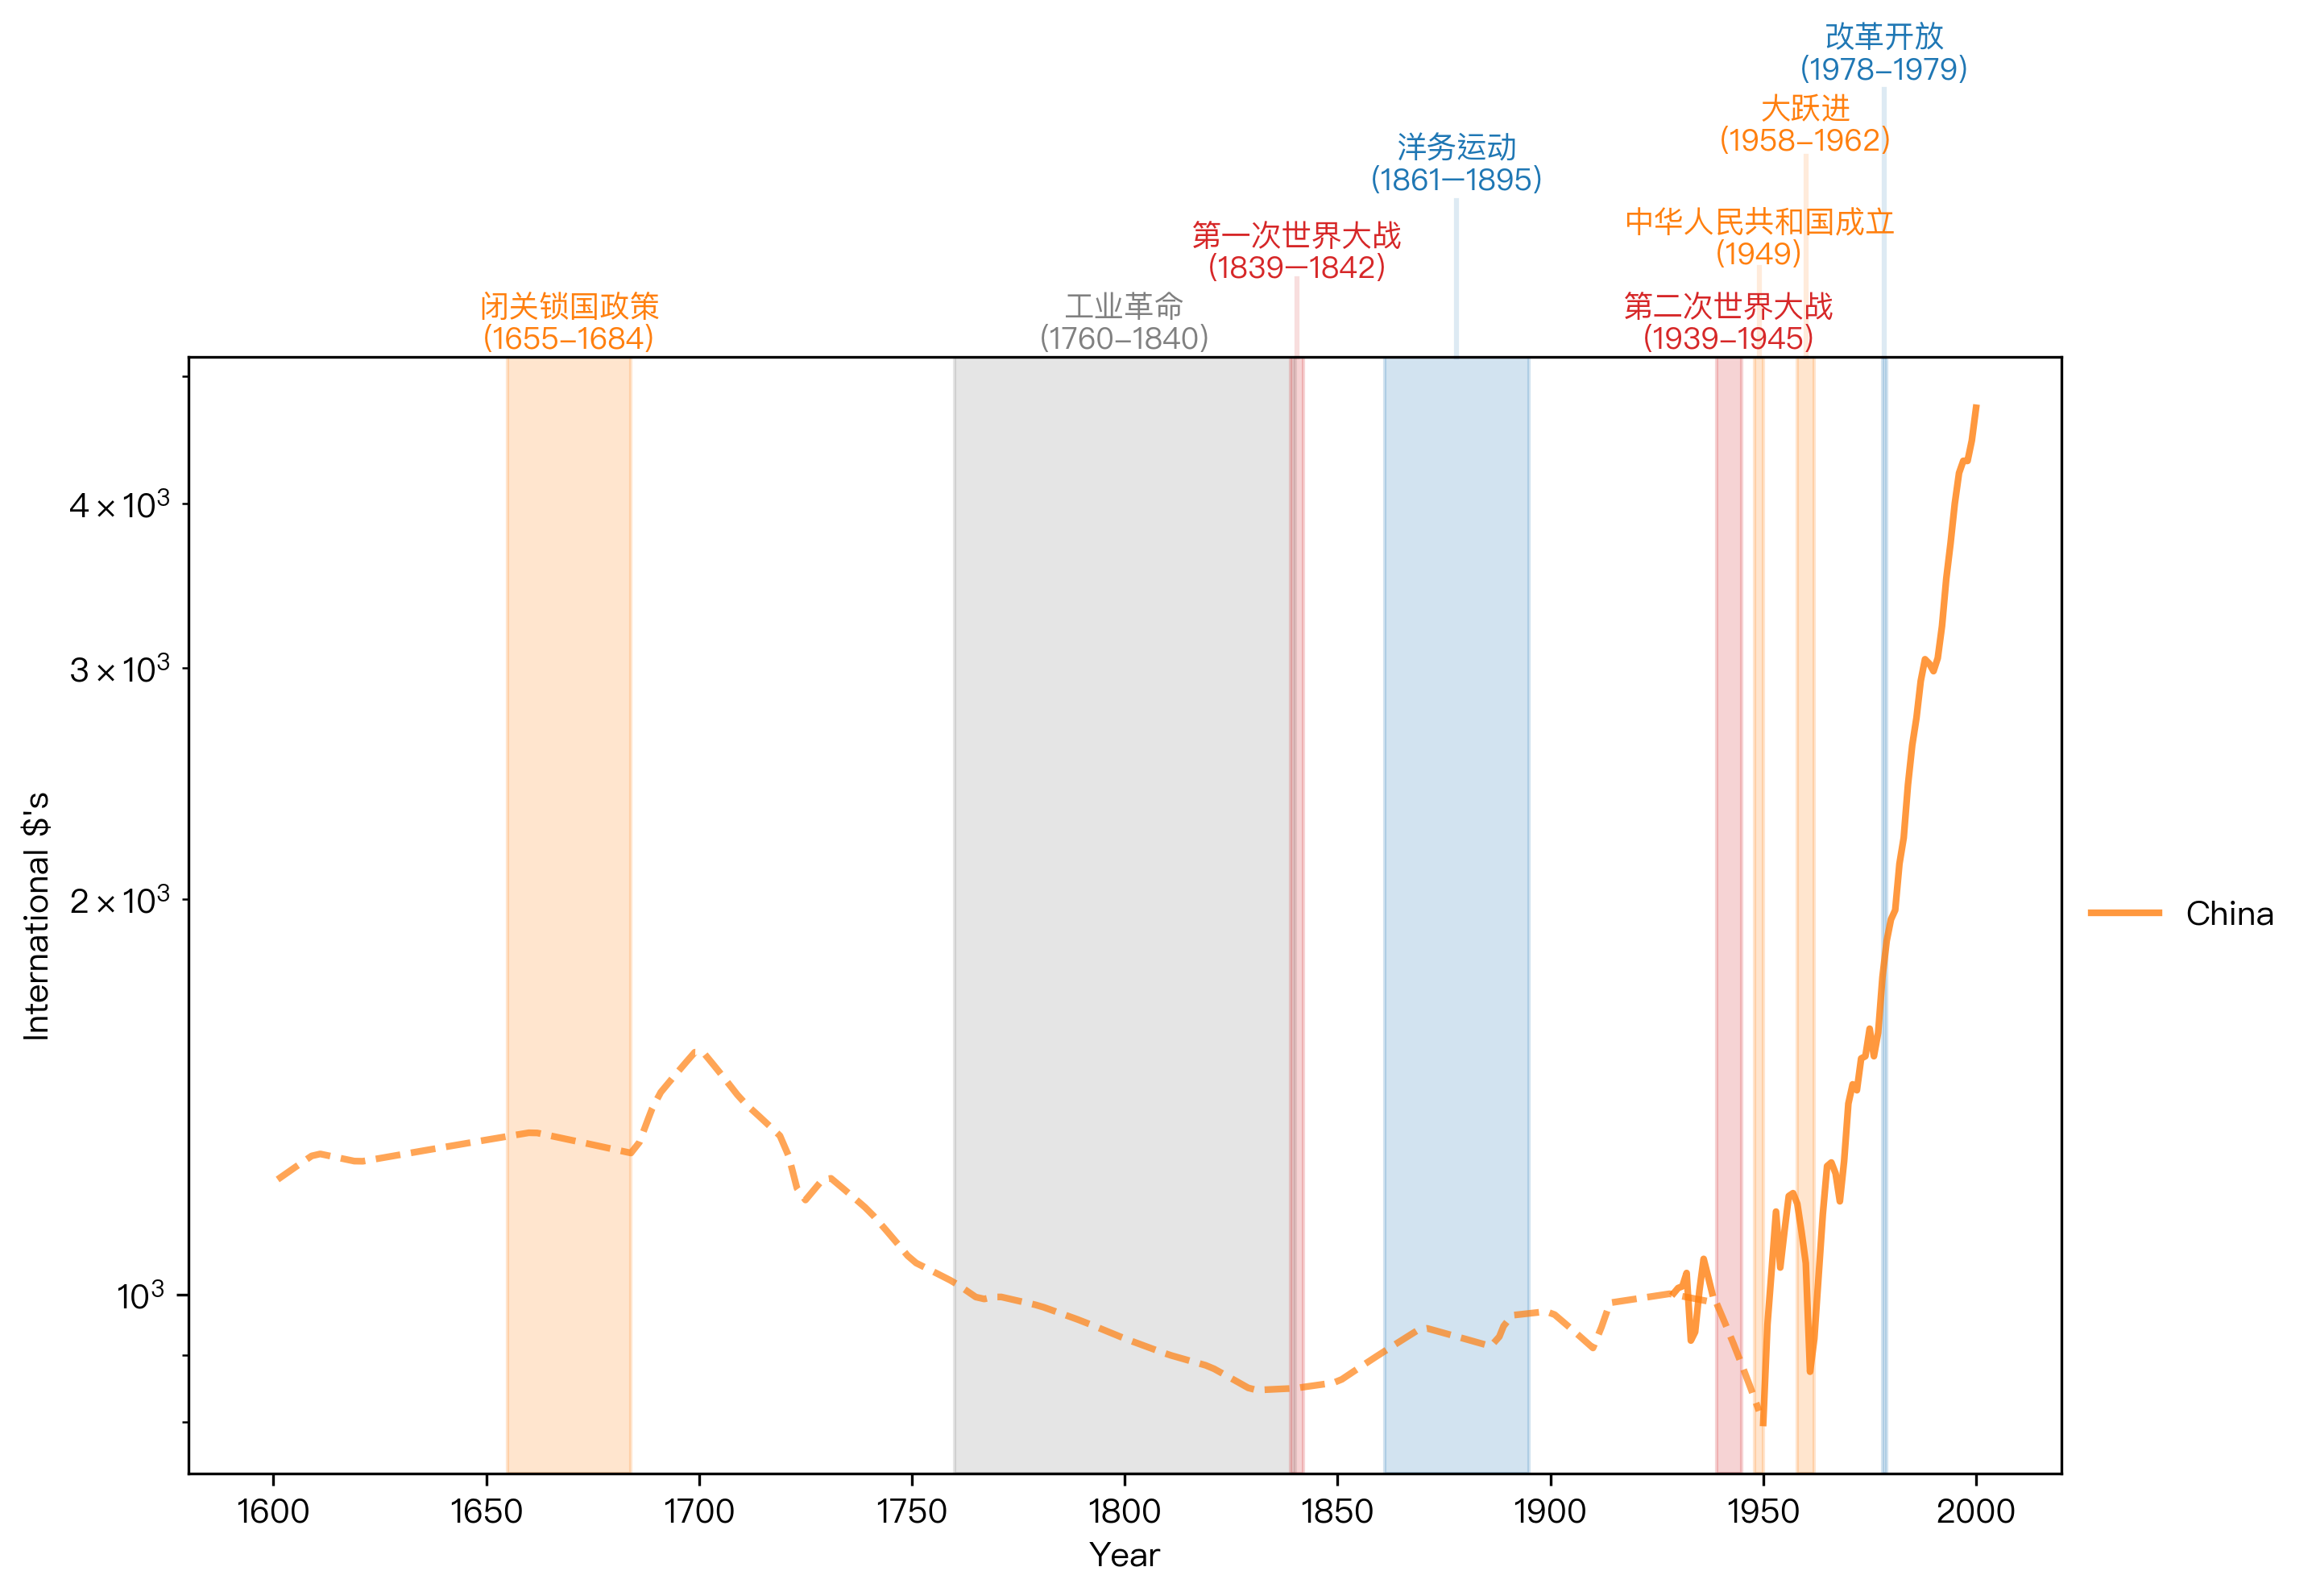

In [50]:
# 绘制中国近年来的GDP
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

countries = ['CHN']
ax = draw_interp_plots(countries, gdppc[countries].loc[1600:2000],
    'International $\'s','Year',
    color_map, country_code_name_map, 2, True, ax)

ylim = ax.get_ylim()[1]

events = [
    Event((1655, 1684), ylim + ylim*0.06, 
          '闭关锁国政策\n(1655-1684)', 
          'tab:orange', 1),
    Event((1760, 1840), ylim + ylim*0.06, 
          '工业革命\n(1760-1840)', 
          'grey', 1),
    Event((1839, 1842), ylim + ylim*0.2, 
          '第一次世界大战\n(1839–1842)', 
          'tab:red', 1.07),
    Event((1861, 1895), ylim + ylim*0.4, 
          '洋务运动\n(1861–1895)', 
          'tab:blue', 1.14),
    Event((1939, 1945), ylim + ylim*0.06, 
          '第二次世界大战\n(1939-1945)', 
          'tab:red', 1),
    Event((1948, 1950), ylim + ylim*0.23, 
          '中华人民共和国成立\n(1949)', 
          color_map['CHN'], 1.08),
    Event((1958, 1962), ylim + ylim*0.5, 
          '大跃进\n(1958-1962)', 
          'tab:orange', 1.18),
    Event((1978, 1979), ylim + ylim*0.7, 
          '改革开放\n(1978-1979)', 
          'tab:blue', 1.24)
]

# Draw events
draw_events(events, ax)
plt.show()

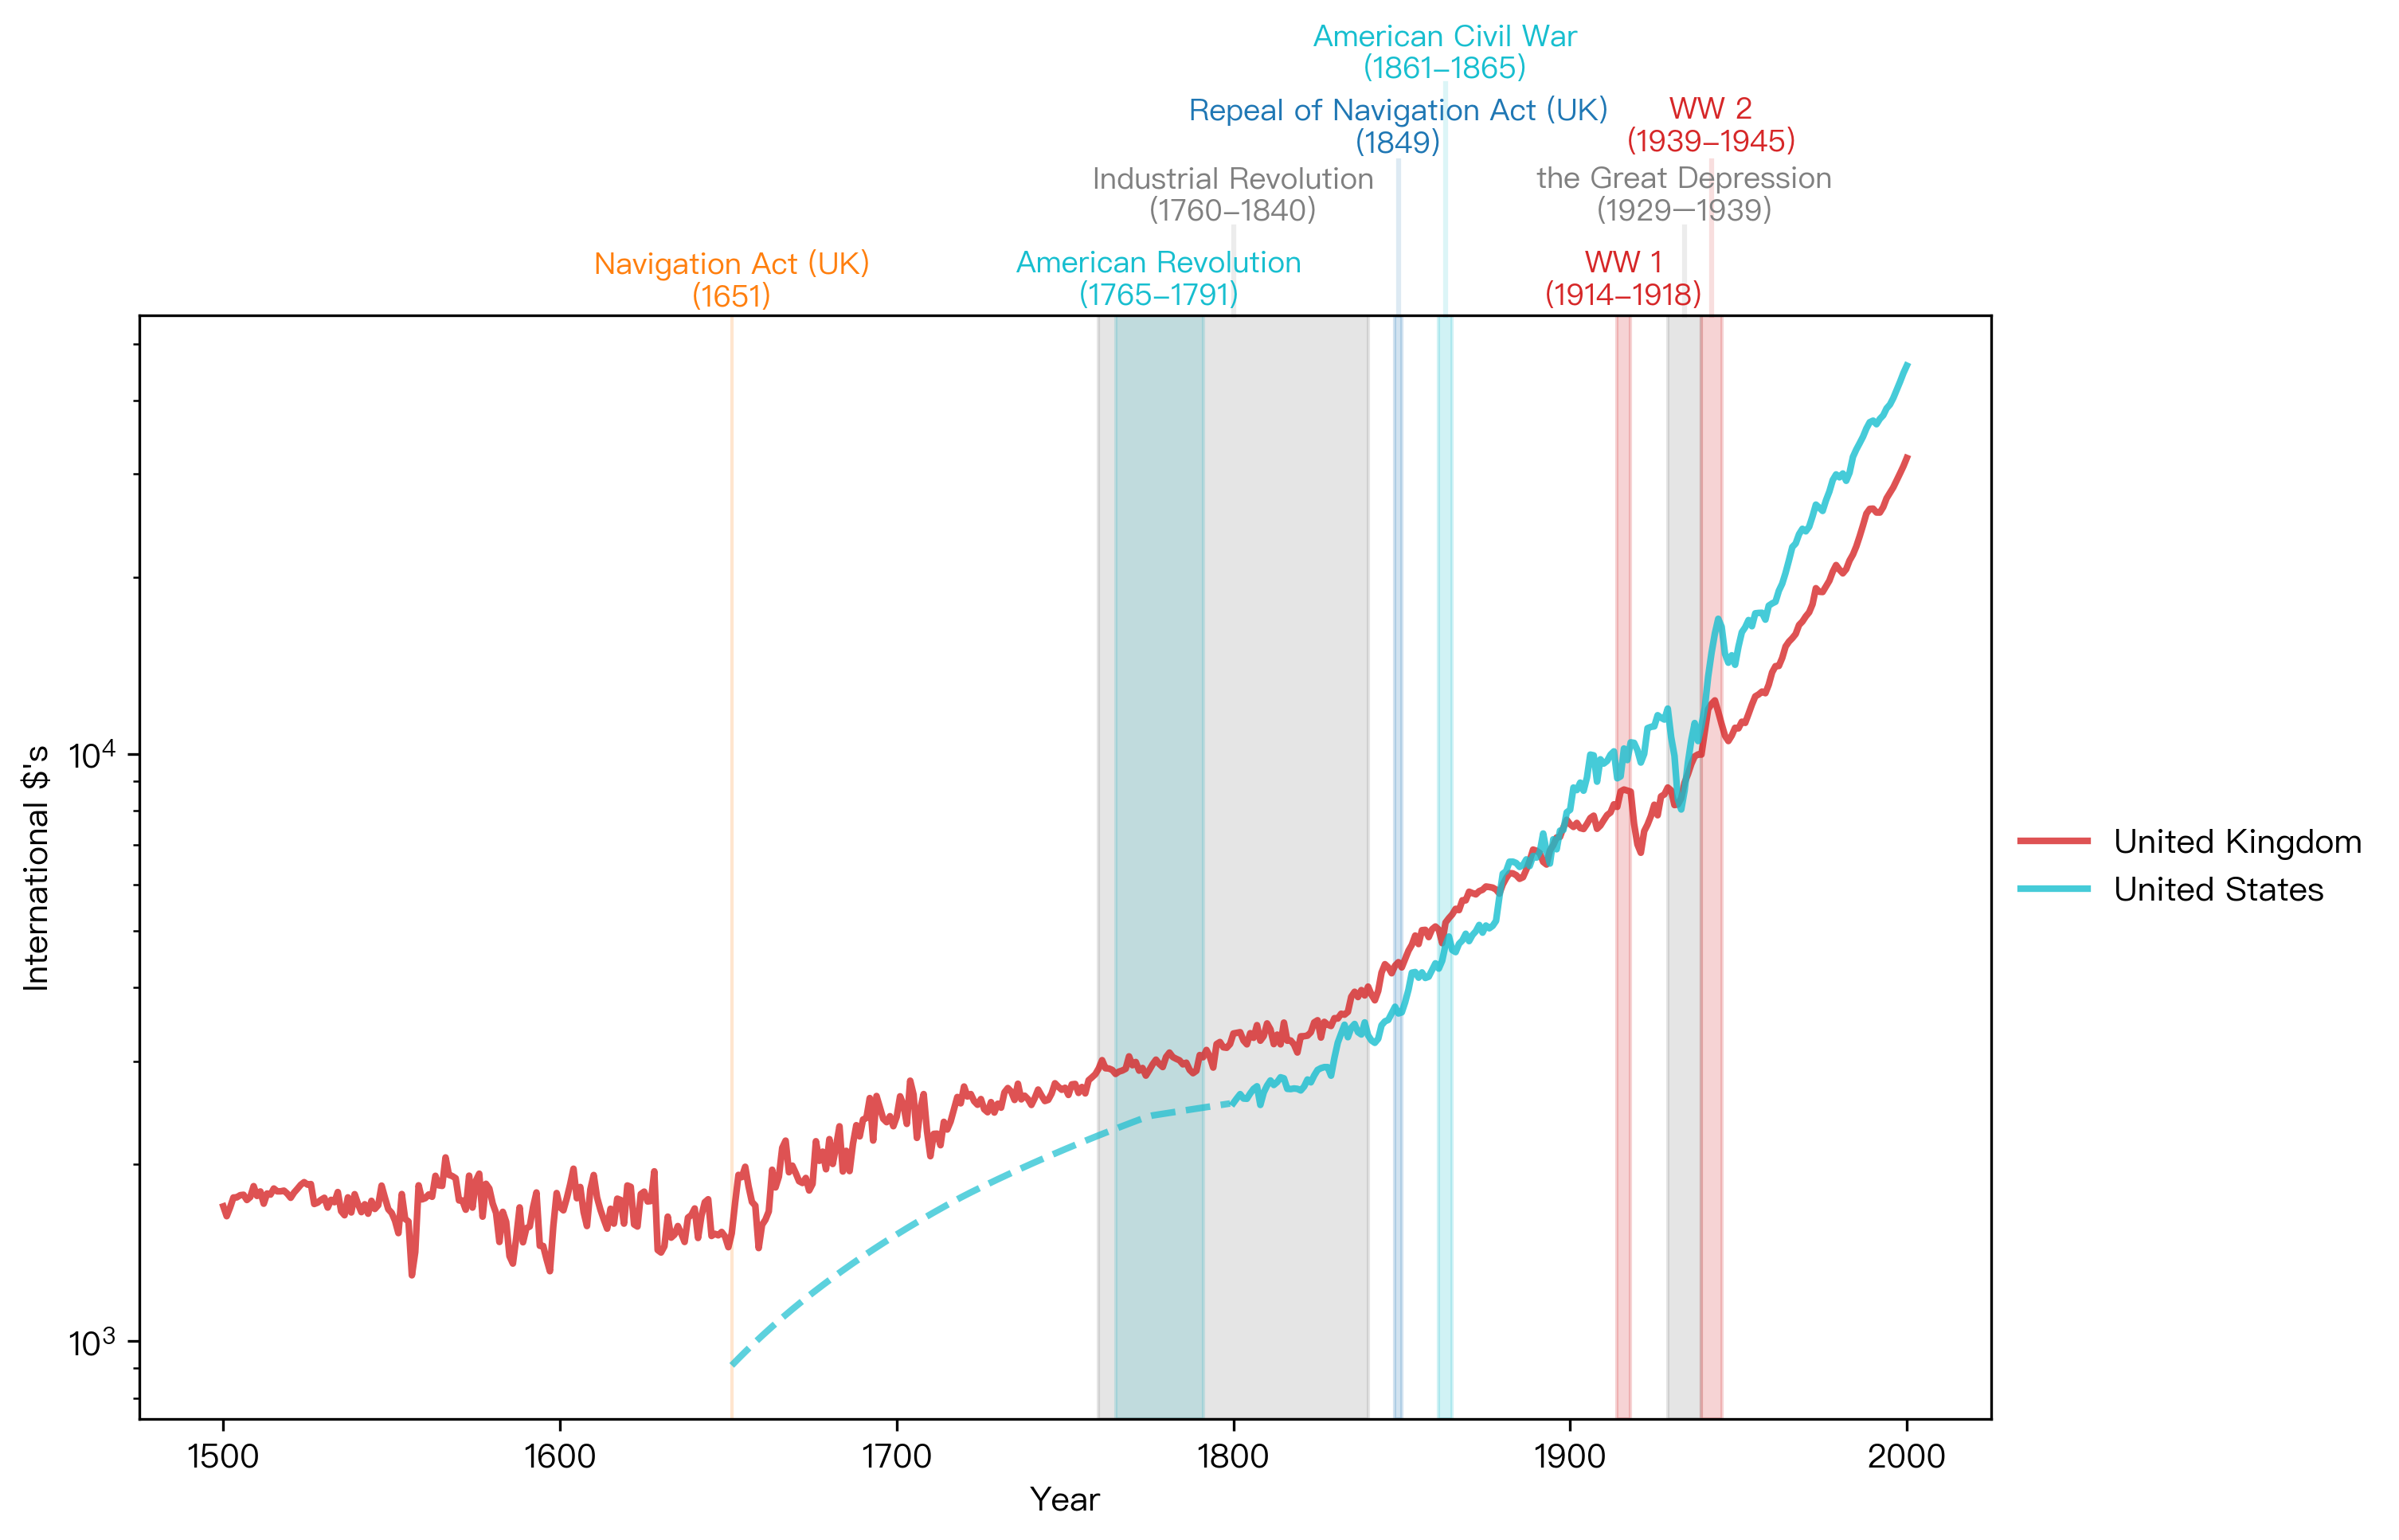

In [51]:
# 美国英国的GPD
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

countries = ['GBR', 'USA']
ax = draw_interp_plots(countries, gdppc[countries].loc[1500:2000],
    'International $\'s','Year',
    color_map, country_code_name_map, 2, True, ax)

ylim = ax.get_ylim()[1]

# Create a list of data points=
events = [
    Event((1651, 1651), ylim + ylim*0.15, 
          'Navigation Act (UK)\n(1651)', 
          'tab:orange', 1),
    Event((1765, 1791), ylim + ylim*0.15, 
          'American Revolution\n(1765-1791)',
          color_map['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.6, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.08),
    Event((1848, 1850), ylim + ylim*1.1, 
          'Repeal of Navigation Act (UK)\n(1849)', 
          'tab:blue', 1.14),
    Event((1861, 1865), ylim + ylim*1.8, 
          'American Civil War\n(1861-1865)', 
          color_map['USA'], 1.21),
    Event((1914, 1918), ylim + ylim*0.15, 
          'WW 1\n(1914-1918)', 
          'tab:red', 1),
    Event((1929, 1939), ylim + ylim*0.6, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1.08),
    Event((1939, 1945), ylim + ylim*1.1, 
          'WW 2\n(1939-1945)', 
          'tab:red', 1.14)
]

# Draw events
draw_events(events, ax)
plt.show()

In [54]:
# 区域分析
df = pd.read_excel('./data/mpd2020.xlsx', sheet_name='Regional data', header=(0, 1, 2), index_col=0)
df.columns = df.columns.droplevel(level=2)
regional_gdppc = df['gdppc_2011'].copy()
regional_gdppc.index = pd.to_datetime(regional_gdppc.index, format='%Y')

regional_gdppc.interpolate(method='time', inplace=True)
regional_gdppc

Region,Western Europe,Eastern Europe,Western Offshoots,Latin America,Asia (East),Asia (South and South-East),Middle East,Sub-Sahara Africa,World GDP pc
1820-01-01,2306.966690,818.000000,2513.045418,952.816821,1088.584951,929.000000,974.000000,800.000000,1101.565459
1830-01-01,2384.314573,942.000000,2833.529572,995.434209,1025.603440,929.000000,982.667458,800.000000,1142.741085
1840-01-01,2579.534884,907.000000,3153.925995,1038.039930,962.639169,929.000000,991.332542,800.000000,1183.905440
1850-01-01,2678.000000,985.000000,3474.410149,1080.657319,899.657658,929.000000,1000.000000,800.000000,1225.081067
1860-01-01,3034.000000,1358.000000,4214.440703,1588.000000,944.561264,889.678669,1082.488706,800.000000,1361.513017
1870-01-01,3301.304919,1575.000000,4647.453901,1318.541091,989.477165,850.346572,1165.000000,800.000000,1497.982325
1880-01-01,3585.154363,1886.000000,6019.123928,1495.652778,1021.757979,900.666015,1209.995893,816.665146,1735.980932
1890-01-01,4079.313847,2204.000000,6480.955612,1672.812962,1054.047632,950.999236,1255.004107,833.334854,1974.044709
1900-01-01,4724.295785,2700.000000,7740.850451,1750.626743,1086.328445,994.419007,1300.000000,850.000000,2212.043316
1910-01-01,5134.759064,2282.571503,9354.690921,2193.539665,1123.164223,1143.117595,1100.000000,900.000000,2226.604364


In [55]:
# 世界人均GDP
world_gdppc = regional_gdppc['World GDP pc']
world_gdppc

1820-01-01     1101.565459
1830-01-01     1142.741085
1840-01-01     1183.905440
1850-01-01     1225.081067
1860-01-01     1361.513017
1870-01-01     1497.982325
1880-01-01     1735.980932
1890-01-01     1974.044709
1900-01-01     2212.043316
1910-01-01     2226.604364
1920-01-01     2241.165411
1930-01-01     2687.242924
1940-01-01     3133.198324
1950-01-01     3350.566456
1960-01-01     4385.786356
1970-01-01     5951.549063
1980-01-01     7232.973298
1990-01-01     8222.478204
2000-01-01     9914.567730
2010-01-01    13179.495469
2016-01-01    14700.371742
2017-01-01    14944.093716
2018-01-01    15212.415062
Name: World GDP pc, dtype: float64

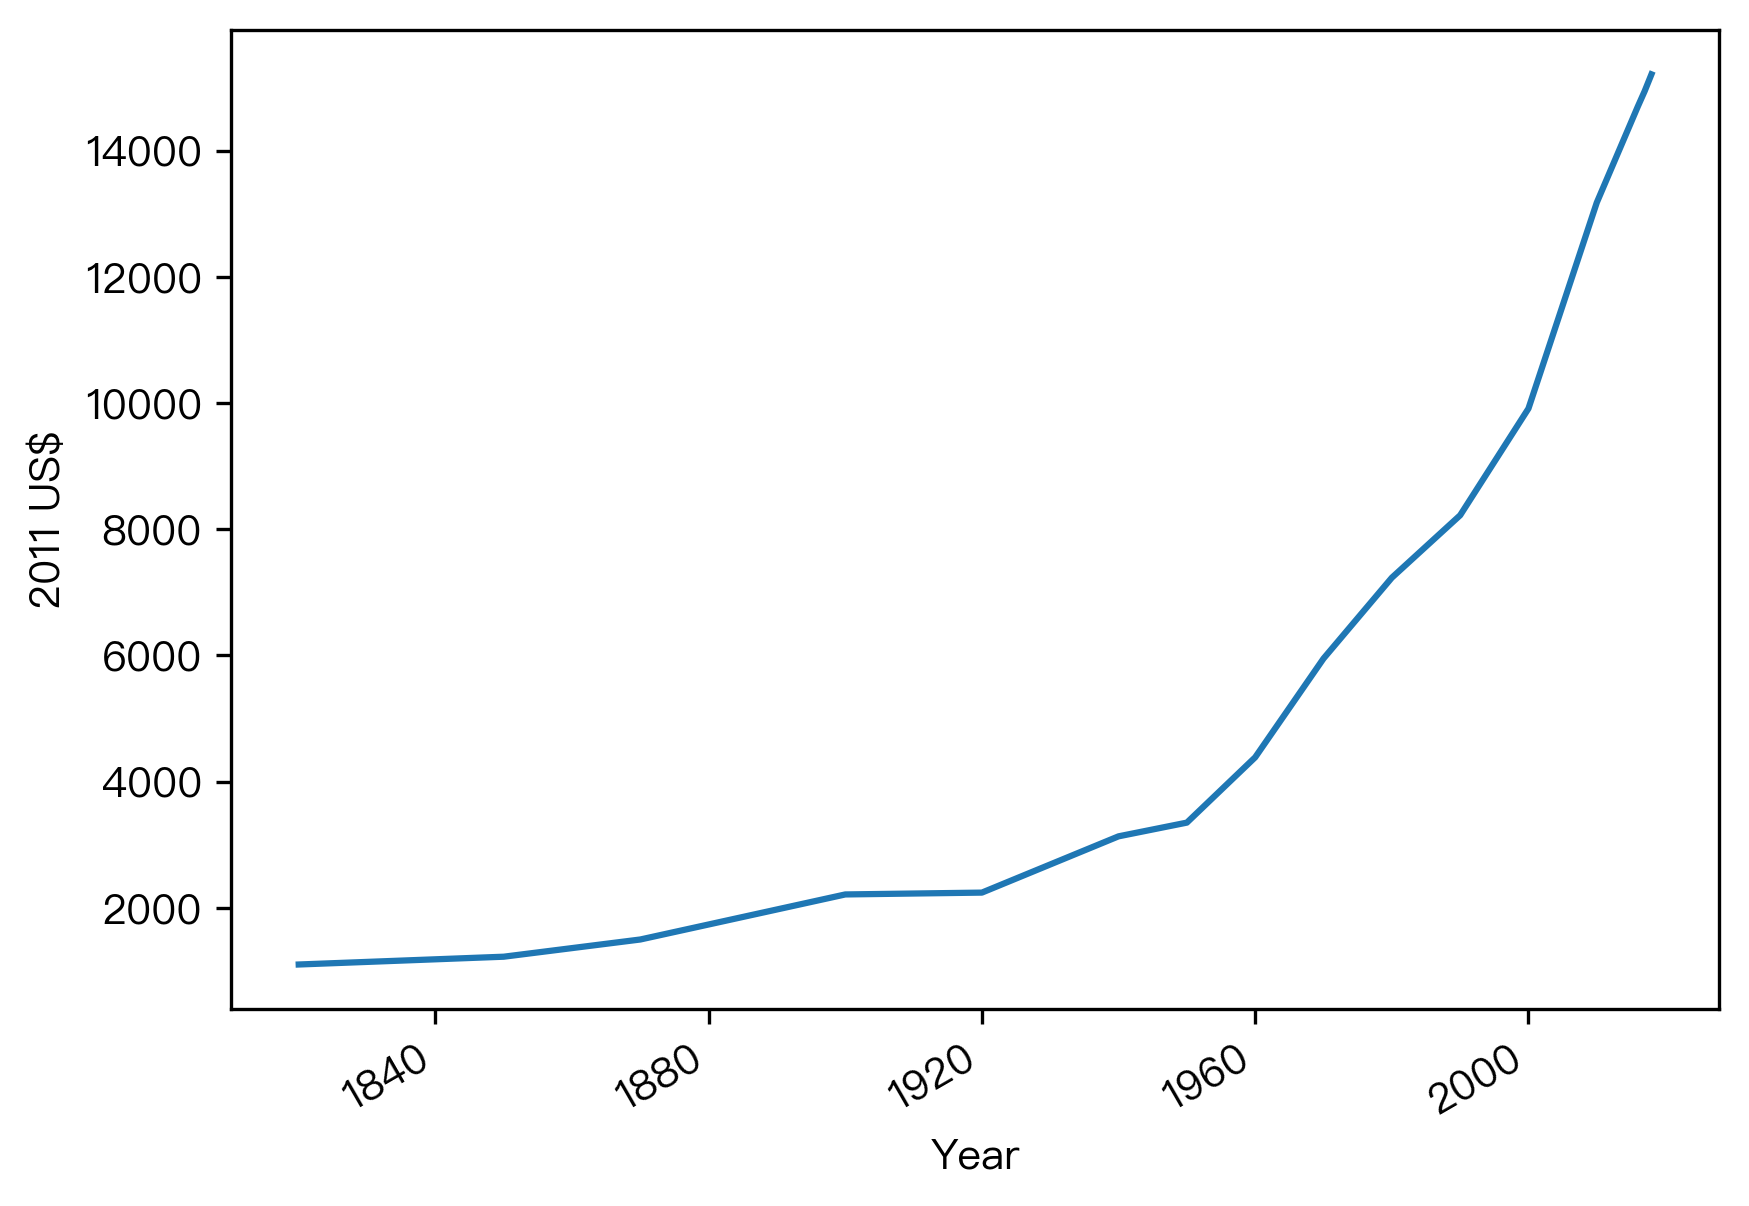

In [56]:
fig = plt.figure(dpi=300)
ax = fig.gca()
ax = world_gdppc.plot(
    ax = ax,
    xlabel='Year',
    ylabel='2011 US$',
)

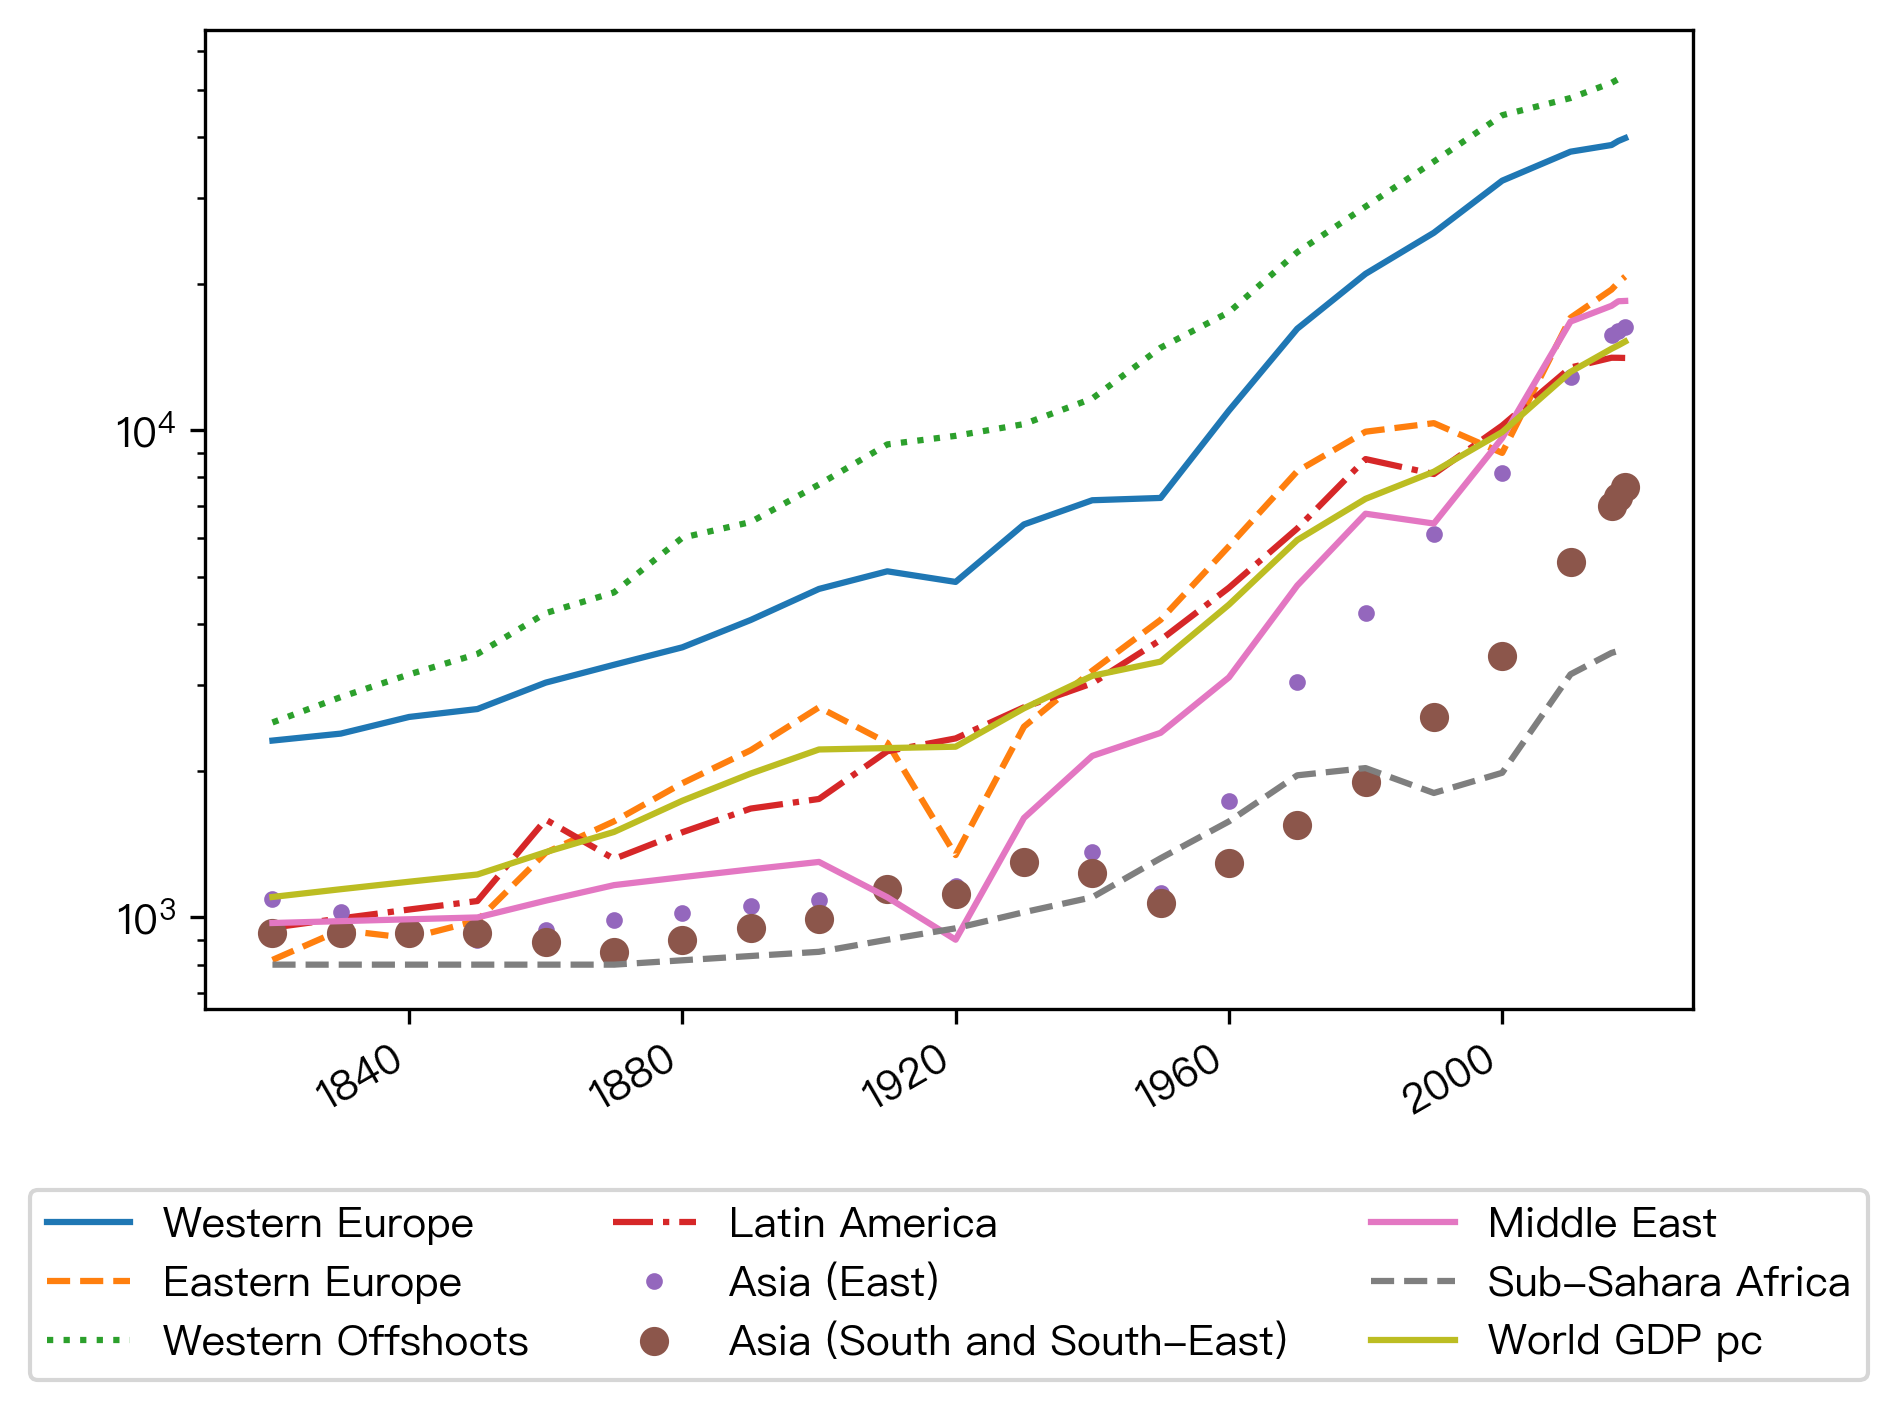

In [57]:
# 地区人均GDP
fig = plt.figure(dpi=300)
ax = fig.gca()
line_styles = ['-', '--', ':', '-.', '.', 'o', '-', '--', '-']
ax = regional_gdppc.plot(ax = ax, style=line_styles)
ax.set_yscale('log')
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=[0.5, -0.4])
plt.show()